In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime
from tqdm import tqdm
#import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
# nltk.download('stopwords') 
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob 
from bs4 import BeautifulSoup
from wordcloud import WordCloud 
from functools import partial
import itertools    
import json
import spacy
#!python -m spacy download en_core_web_sm
sp = spacy.load('en_core_web_sm')
import os.path
from nltk.corpus import stopwords
import numpy as np
import contractions

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [3]:
data_dir = "./src/"
folder = 'plots/'
charts_dir = data_dir + "output/"
model_dir = data_dir + "model/"
os.mkdir(charts_dir)
os.mkdir(model_dir)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data ='dataset/' + "reviews_sample.csv"
df=pd.read_csv(data)
df.head()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author,instance_id,rating,review_body,review_date,review_header,review_link,review_votes,sentiment,verified_purchase
0,0,68,Iluvkindlle,10,3,It’s ok. Doesn’t know much. Can’t answer most ...,2018-09-10,It’s ok,https://www.amazon.com/gp/customer-reviews/R1Z...,0.0,0,True
1,1,70,Ben Burger,10,5,So easy to use.,2018-09-10,Love it,https://www.amazon.com/gp/customer-reviews/R1B...,0.0,0,True
2,2,72,Harry,10,5,Alexa is an entertaining assistant to have aro...,2018-09-10,Echo Dot,https://www.amazon.com/gp/customer-reviews/R1P...,0.0,0,True
3,3,292,Smart Shopper,10,4,Fun and addictive.,2018-09-10,Fun gadget,https://www.amazon.com/gp/customer-reviews/R38...,0.0,0,True
4,4,594,Niva T.,10,4,I think google home assist is much smarter and...,2018-09-11,Its good but prefer google,https://www.amazon.com/gp/customer-reviews/R18...,0.0,0,False


In [5]:
df.columns

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Unnamed: 0', 'id', 'author', 'instance_id', 'rating', 'review_body',
       'review_date', 'review_header', 'review_link', 'review_votes',
       'sentiment', 'verified_purchase'],
      dtype='object')

In [6]:
df=df.rename(columns = {'review_body':'reviews'})
df.tail()

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author,instance_id,rating,reviews,review_date,review_header,review_link,review_votes,sentiment,verified_purchase
95,95,4532,bail.trac,11,5,"Great little gadget, definitely recommend buyi...",2018-08-03,Brilliant,https://www.ebay.com/urw/product-reviews/24268...,NaN,0,True
96,96,4533,susankeeney,11,1,Excellent for music and so much more,2018-07-31,Small but packs a punch,https://www.ebay.com/urw/product-reviews/24268...,NaN,0,True
97,97,4534,uk2014_kath,11,2,She is not as knowledgeable as she could be. D...,2018-07-27,A bit of fun,https://www.ebay.com/urw/product-reviews/24268...,NaN,0,True
98,98,4535,jahar-1823,11,5,NaN,2018-07-26,Great item !,https://www.ebay.com/urw/product-reviews/24268...,NaN,0,True
99,99,4536,papael1,11,5,It's an amazing helper and organizer. Don't re...,2018-07-25,Great helper!,https://www.ebay.com/urw/product-reviews/24268...,NaN,0,True


# Text Preprocessing

In [7]:
stop_words = list(sp.Defaults.stop_words)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#Text Cleaning
def text_cleaner(text):
    text = ' '.join(re.sub("(\w+:\/\/\S+)", " ", str(text)).split())
    # Remove punctuations
    text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", str(text)).split())
    # lower case
    text = text.lower()    
    # Replace contractions eg. wouldn't, wasn't
    text = contractions.fix(text)
    # final clean
    text = ' '.join(re.sub(r"[\\\(/\)]|('s|')", " ", str(text)).split())
    text = ' '.join(re.sub(r"[^a-zA-Z]", " ",str(text)).split()) #keep abc one
    return text


def clean_text(text):
    text=re.sub(r'[^\w\s]','',str(text))
    
def stopword_cleaner(text):
    if text is "":
        return ""    
    text = text.split()
    text_new = " ".join([i for i in text if i not in stop_words])
    return text_new    

def to_lower(text): 
    if len(text) >0:
        return text.lower()
    return ""

def singularize(text):  
    text = text.split()
    text_new = []
    for word in text:
        blob = TextBlob(word)
        text_new.append(blob.words[0].singularize())
    return " ".join(text_new)


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-8-27648ad9d9cf>:3: DeprecationWarning: invalid escape sequence \w
  text = ' '.join(re.sub("(\w+:\/\/\S+)", " ", str(text)).split())
<ipython-input-8-27648ad9d9cf>:5: DeprecationWarning: invalid escape sequence \.
  text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", str(text)).split())


In [9]:
df['reviews'].replace(np.nan,"", regex=True)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     It’s ok. Doesn’t know much. Can’t answer most ...
1                                       So easy to use.
2     Alexa is an entertaining assistant to have aro...
3                                    Fun and addictive.
4     I think google home assist is much smarter and...
                            ...                        
95    Great little gadget, definitely recommend buyi...
96                 Excellent for music and so much more
97    She is not as knowledgeable as she could be. D...
98                                                     
99    It's an amazing helper and organizer. Don't re...
Name: reviews, Length: 100, dtype: object

In [10]:
df['reviews'].dropna(inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df.shape

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 12)

In [14]:
df['reviews'] =df['reviews'].apply(text_cleaner)

In [15]:
df['reviews'] = df.apply(lambda row : stopword_cleaner(row['reviews']), axis=1)

# Sentiment analysis

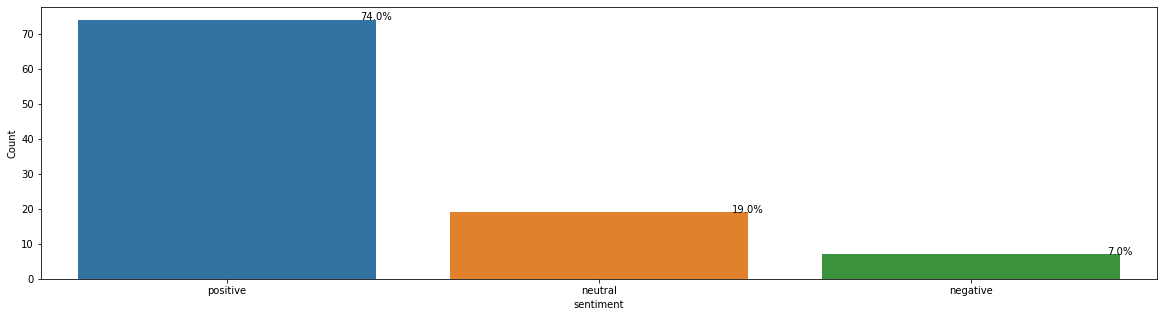

In [16]:
# Plot Sentiment Analysis
def get_text_polarity(tweet): 
    analysis = TextBlob(tweet) 
    return analysis.sentiment.polarity

def get_text_sentiment(polarity): 
    if polarity > 0: 
        return 'positive'
    elif polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

def plot_sentiment(sentiment,terms = 30, save_file = 'plot'):
    fdist = FreqDist(sentiment)
    words_df = pd.DataFrame({'sentiment':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    total = float(len(df))                                   # % calculation
    ax = sns.barplot(data=d, x= "sentiment", y = "count")
    ax.set(ylabel = 'Count')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        plt.savefig(charts_dir + save_file + '.png')
    plt.show()
    

df['sentiment_polarity'] = df.apply(lambda row :get_text_polarity(row['reviews']),axis=1)
df['sentiment'] = df.apply(lambda row :get_text_sentiment(row['sentiment_polarity']),axis=1)
plot_sentiment(df['sentiment'].values, 30, 'sentiment')

In [17]:
text = " ".join(review for review in df.reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6839 words in the combination of all review.


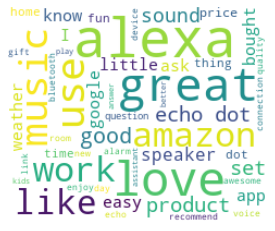

<Figure size 432x288 with 0 Axes>

In [18]:
wc_stopwords = set()
wc_stopwords.update(['people'])
wordcloud = WordCloud(stopwords=wc_stopwords, max_font_size=50, max_words=50,width=240,height=200, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig(charts_dir + 'word_cloud.png')
plt.show()
#wordcloud.to_file(charts_dir + 'word_cloud.png')

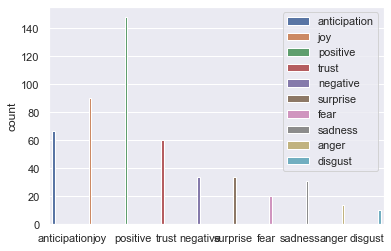

In [19]:
from nrclex import NRCLex
text_object = NRCLex(text)

sns.set_theme(style="darkgrid")
ax = sns.countplot(x=text_object.affect_list, hue=text_object.affect_list,data=df)
fig = ax.get_figure()
fig.savefig(charts_dir  + 'nrc.png')

In [20]:
df['reviews_unstem'] = df['reviews']

In [21]:
stemmer = PorterStemmer()
def stemming(words):
    output=[]
    for word in words:
          output.append(stemmer.stem(word))
    return ' '.join(output) 

In [22]:
tokenized_reviews = pd.Series(df['reviews']).apply(lambda x: x.split())

In [23]:
from gensim import  corpora, models
dictionary = corpora.Dictionary(tokenized_reviews) 

In [24]:
corpus = [dictionary.doc2bow(rev) for rev in tokenized_reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = models.LdaMulticore(corpus=corpus, id2word=dictionary, 
                                num_topics=10, random_state=100, chunksize=1000, passes=50, workers=2)

In [25]:
lda_model.save(model_dir+'/topic.model')

In [26]:
lda_model.print_topics() 

[(0,
  '0.044*"great" + 0.025*"love" + 0.025*"works" + 0.019*"like" + 0.019*"sound" + 0.019*"good" + 0.013*"awesome" + 0.013*"clock" + 0.013*"kids" + 0.013*"weather"'),
 (1,
  '0.036*"music" + 0.018*"use" + 0.018*"love" + 0.018*"alexa" + 0.012*"set" + 0.012*"speaker" + 0.012*"convenient" + 0.012*"play" + 0.012*"google" + 0.012*"price"'),
 (2,
  '0.034*"product" + 0.023*"great" + 0.017*"little" + 0.017*"works" + 0.017*"awesome" + 0.017*"love" + 0.012*"bought" + 0.012*"device" + 0.012*"recommend" + 0.012*"home"'),
 (3,
  '0.056*"nan" + 0.015*"assistant" + 0.015*"list" + 0.015*"frustrate" + 0.015*"away" + 0.015*"fair" + 0.015*"person" + 0.015*"threw" + 0.015*"garbage" + 0.015*"torture"'),
 (4,
  '0.040*"bluetooth" + 0.030*"laptop" + 0.021*"love" + 0.021*"connected" + 0.021*"mobile" + 0.011*"learning" + 0.011*"like" + 0.011*"sound" + 0.011*"easy" + 0.011*"hook"'),
 (5,
  '0.041*"alexa" + 0.033*"great" + 0.017*"thing" + 0.017*"remember" + 0.017*"music" + 0.015*"perfect" + 0.009*"quality" + 

# Visualize the topics

In [27]:
np.random.seed(5)
pyLDAvis.enable_notebook()
def draw_mds(mds):        
    vis = gensimvis.prepare(lda_model, corpus, dictionary, mds=mds)
    pyLDAvis.save_html(vis, charts_dir + 'lda_' + mds + '.html')
    return vis

In [28]:
import gensim
vis = draw_mds('mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.184007 -0.113509       1        1  16.280028
6     -0.052360  0.218693       2        1  12.370508
2     -0.165102  0.102282       3        1  12.295920
8      0.138883 -0.159468       4        1  11.658804
1      0.135408 -0.033504       5        1  11.271408
7      0.164850  0.068830       6        1  10.820165
0      0.071296  0.130887       7        1  10.397730
5      0.000117 -0.161943       8        1   7.135733
4     -0.092063 -0.006721       9        1   5.354883
3     -0.017024 -0.045548      10        1   2.414821, topic_info=          Term       Freq      Total Category  logprob  loglift
17       great  15.000000  15.000000  Default   30.000  30.0000
20        love  13.000000  13.000000  Default   29.000  29.0000
49       music  10.000000  10.000000  Default   28.000  28.0000
296  bluetooth   3.000000   3.000000  Default   27.000  27.0000
470        nan   1.000000   1.000000  Default   26.000  26.0000
..         ...        ...        ...      ...      ...      ...
10       alexa   0.033609  21.884345  Topic10   -6.593  -2.7552
499       find   0.033609   1.322652  Topic10   -6.593   0.0510
494    theatre   0.033609   2.171119  Topic10   -6.593  -0.4447
242      price   0.033609   5.397444  Topic10   -6.593  -1.3553
467    sockets   0.033609   2.091962  Topic10   -6.593  -0.4075

[533 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
119       1  0.392265        I
119       4  0.196132        I
119       5  0.196132        I
119       9  0.196132        I
295       9  0.858522   access
...     ...       ...      ...
283       8  0.376462    worth
118       2  0.744864    write
442       6  0.757846  wyoming
372       1  0.921184     year
443       6  0.757846      yes

[597 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 3, 9, 2, 8, 1, 6, 5, 4])

In [29]:
vis = draw_mds('pcoa')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.024565 -0.175381       1        1  16.280029
6      0.197773  0.073828       2        1  12.370507
2      0.005891 -0.001736       3        1  12.295923
8     -0.108022  0.066213       4        1  11.658804
1     -0.025495  0.060239       5        1  11.271408
7     -0.054998 -0.000534       6        1  10.820165
0     -0.040280 -0.025259       7        1  10.397727
5     -0.039260  0.047864       8        1   7.135733
4      0.017555 -0.052046       9        1   5.354882
3      0.022272  0.006811      10        1   2.414821, topic_info=          Term       Freq      Total Category  logprob  loglift
17       great  15.000000  15.000000  Default   30.000  30.0000
20        love  13.000000  13.000000  Default   29.000  29.0000
49       music  10.000000  10.000000  Default   28.000  28.0000
296  bluetooth   3.000000   3.000000  Default   27.000  27.0000
470        nan   1.000000   1.000000  Default   26.000  26.0000
..         ...        ...        ...      ...      ...      ...
10       alexa   0.033609  21.884345  Topic10   -6.593  -2.7552
499       find   0.033609   1.322652  Topic10   -6.593   0.0510
494    theatre   0.033609   2.171119  Topic10   -6.593  -0.4447
242      price   0.033609   5.397445  Topic10   -6.593  -1.3553
467    sockets   0.033609   2.091962  Topic10   -6.593  -0.4075

[533 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
119       1  0.392265        I
119       4  0.196132        I
119       5  0.196132        I
119       9  0.196132        I
295       9  0.858522   access
...     ...       ...      ...
283       8  0.376462    worth
118       2  0.744864    write
442       6  0.757846  wyoming
372       1  0.921184     year
443       6  0.757846      yes

[597 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 3, 9, 2, 8, 1, 6, 5, 4])

In [30]:
vis = draw_mds('tsne')
vis


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  16.280029
6       0.648955  71.707100       2        1  12.370508
2      71.019684   9.971006       3        1  12.295922
8       3.785981  33.185135       4        1  11.658803
1     -42.666500  -9.222070       5        1  11.271409
7      -3.621689 -43.526516       6        1  10.820165
0      -3.632402  -4.171708       7        1  10.397729
5     -36.584400  35.804413       8        1   7.135732
4      44.391380  50.615383       9        1   5.354881
3      40.235809 -31.591665      10        1   2.414821, topic_info=          Term       Freq      Total Category  logprob  loglift
17       great  15.000000  15.000000  Default   30.000  30.0000
20        love  13.000000  13.000000  Default   29.000  29.0000
49       music  10.000000  10.000000  Default   28.000  28.0000
296  bluetooth   3.000000   3.000000  Default   27.000  27.0000
470        nan   1.000000   1.000000  Default   26.000  26.0000
..         ...        ...        ...      ...      ...      ...
10       alexa   0.033609  21.884345  Topic10   -6.593  -2.7552
499       find   0.033609   1.322652  Topic10   -6.593   0.0510
494    theatre   0.033609   2.171119  Topic10   -6.593  -0.4447
242      price   0.033609   5.397445  Topic10   -6.593  -1.3553
467    sockets   0.033609   2.091962  Topic10   -6.593  -0.4075

[533 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
119       1  0.392265        I
119       4  0.196132        I
119       5  0.196132        I
119       9  0.196132        I
295       9  0.858522   access
...     ...       ...      ...
283       8  0.376462    worth
118       2  0.744864    write
442       6  0.757846  wyoming
372       1  0.921184     year
443       6  0.757846      yes

[597 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 3, 9, 2, 8, 1, 6, 5, 4])

In [31]:
def format_topics_sentences(lda_model, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['dominant_topic', 'topic_perc_contrib', 'topic_keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, tokenized_reviews)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['row_no', 'dominant_topic', 'topic_perc_contrib', 'topic_keywords', 'text']

In [32]:
df_dominant_topic

,row_no,dominant_topic,topic_perc_contrib,topic_keywords,text
0,0,1.0,0.9000,"music, use, love, alexa, set, speaker, conveni...","[ok, know, answer, questions, gotten, google, ..."
1,1,6.0,0.7000,"alexa, use, amazon, easy, apps, link, good, go...","[easy, use]"
2,2,5.0,0.7750,"alexa, great, thing, remember, music, perfect,...","[alexa, entertaining, assistant]"
3,3,8.0,0.7000,"music, alarm, ordered, dot, echo, sound, great...","[fun, addictive]"
4,4,7.0,0.9250,"love, alexa, great, dot, echo, day, use, music...","[think, google, home, assist, smarter, works, ..."
...,...,...,...,...,...
95,95,5.0,0.8714,"alexa, great, thing, remember, music, perfect,...","[great, little, gadget, definitely, recommend,..."
96,96,5.0,0.6999,"alexa, great, thing, remember, music, perfect,...","[excellent, music]"
97,97,8.0,0.7750,"music, alarm, ordered, dot, echo, sound, great...","[knowledgeable, know, suffolk]"
98,98,3.0,0.5500,"nan, assistant, list, frustrate, away, fair, p...",[nan]


In [33]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('dominant_topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['topic_perc_contrib'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "topic_perc_contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,topic_perc_contrib,Keywords,Representative Text
0,0.0,0.9526,"great, love, works, like, sound, good, awesome, clock, kids, weather","[awesome, works, like, charm, tons, stuff, alarm, clock, radio, facts, weather, awesome, great, ..."
1,1.0,0.9727,"music, use, love, alexa, set, speaker, convenient, play, google, price","[bit, skeptical, voice, assistant, use, life, convenient, convenient, set, timer, cooking, dinne..."
2,2.0,0.9786,"product, great, little, works, awesome, love, bought, device, recommend, home","[little, gadget, great, start, automation, home, order, tracking, amazon, shipping, dropping, te..."
3,3.0,0.9100,"nan, assistant, list, frustrate, away, fair, person, threw, garbage, torture","[absolute, garbage, understands, threw, away, fair, torture, frustrate, person]"
4,4.0,0.9640,"bluetooth, laptop, love, connected, mobile, learning, like, sound, easy, hook","[I, connected, laptop, mobile, amazon, echo, dot, bluetooth, start, laptop, confuses, drops, con..."
5,5.0,0.9654,"alexa, great, thing, remember, music, perfect, quality, thank, time, play","[live, perfect, thing, lost, dog, feeling, lonely, dot, arrived, mail, longer, alexa, talks, act..."
6,6.0,0.9895,"alexa, use, amazon, easy, apps, link, good, google, feedback, honeywell","[biggest, complaint, alexa, units, search, engine, good, compared, google, google, gets, good, r..."
7,7.0,0.9868,"love, alexa, great, dot, echo, day, use, music, fun, weather","[echo, dot, alexa, fun, friend, love, talking, alexa, awaken, bedtime, course, anytime, day, gre..."
8,8.0,0.9750,"music, alarm, ordered, dot, echo, sound, great, set, I, room","[actually, ordered, saw, lightening, deal, loved, days, later, ordered, second, honestly, I, goi..."
9,9.0,0.9855,"alexa, dot, echo, amazon, connection, like, ask, home, crackle, information","[know, set, properly, echo, dot, work, mother, received, gift, impressed, opportunity, came, jum..."


In [ ]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
